In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

import warnings
warnings.filterwarnings('ignore')

# Naive Bayes

## Classification

In [2]:
# https://scikit-learn.org/stable/modules/naive_bayes.html

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, test_size=0.5, random_state=0)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Training set score: {:.2f}".format(gnb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gnb.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.95


In [3]:
from sklearn.metrics import classification_report

print(classification_report(y_test, gnb.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        25
     class 2       0.92      0.92      0.92        25
     class 3       0.92      0.92      0.92        25

   micro avg       0.95      0.95      0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



# Decision Trees

## Classification

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print(classification_report(y_test, tree.predict(X_test),
                            target_names=["class 1", "class 2","class 3"]))

Accuracy on training set: 1.000
Accuracy on test set: 0.893
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        25
     class 2       0.87      0.80      0.83        25
     class 3       0.81      0.88      0.85        25

   micro avg       0.89      0.89      0.89        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.89      0.89      0.89        75



In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.893


In [6]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.03846154 0.         0.96153846]


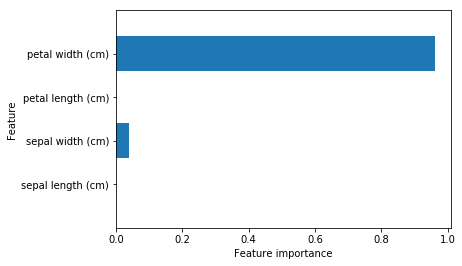

In [7]:
def plot_feature_importances_cancer(model):
    n_features = iris.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

## Regression

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston()

Xreg, yreg = mglearn.datasets.load_extended_boston()

Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(Xreg, yreg, random_state=0)

tree = DecisionTreeRegressor(max_depth=3).fit(Xreg_train, yreg_train)
linear_reg = LinearRegression().fit(Xreg_train, yreg_train)

print("Decision Tree R^2: {:.2f}".format(tree.score(Xreg_test, yreg_test)))
print("Linear Regression R^2: {:.2f}".format(linear_reg.score(Xreg_test, yreg_test)))

Decision Tree R^2: 0.63
Linear Regression R^2: 0.61


In [9]:
from sklearn.metrics import mean_squared_error

print("Decision Tree RMSE: {:.2f}".format(mean_squared_error(yreg_test, tree.predict(Xreg_test))))
print("Linear Regression RMSE: {:.2f}".format(mean_squared_error(yreg_test, linear_reg.predict(Xreg_test))))

Decision Tree RMSE: 29.91
Linear Regression RMSE: 32.07


# Random Forests

## Classification

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.933


In [11]:
forest = RandomForestClassifier(n_estimators=5, random_state=2, max_depth=1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.947
Accuracy on test set: 0.973


In [12]:
forest = RandomForestClassifier(n_estimators=5, random_state=2, max_features=1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.960


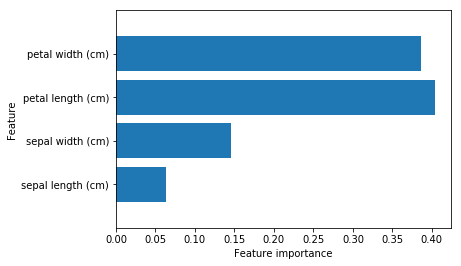

In [13]:
plot_feature_importances_cancer(forest)

# Gradient Boosted Regression Trees

## Classification

In [14]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.893


In [15]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.893


In [16]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.893


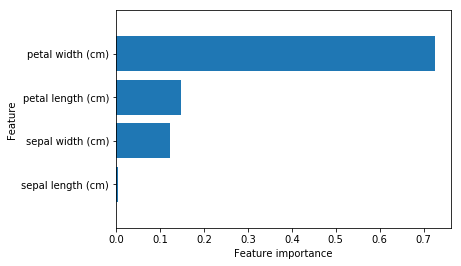

In [17]:
plot_feature_importances_cancer(gbrt)